Simple notebook just for reference to show clearly how numpy does cross correlation.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cityblock

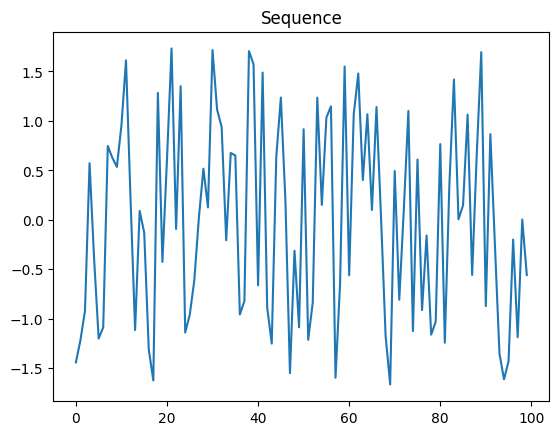

In [2]:
sequence = np.random.rand(100)
mean = np.mean(sequence)
standardDev = np.std(sequence)
sequence = (sequence - mean) / standardDev

fig = plt.figure()
plt.title("Sequence")

plt.plot(sequence)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

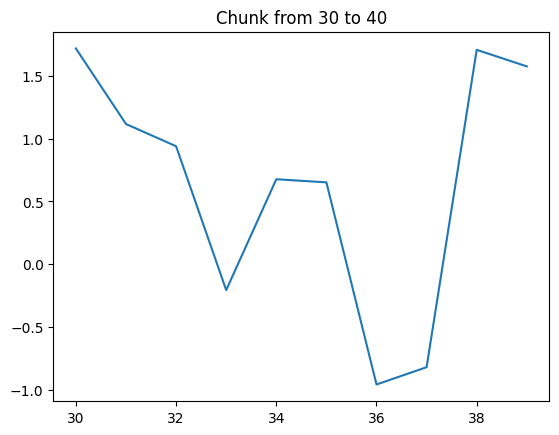

In [3]:
chunk = sequence[30:40]

fig = plt.figure()
plt.title("Chunk from 30 to 40")
plt.plot(np.arange(30, 40), chunk)
plt.show

index of max overlap: 30
max overlap: 12.968392136267159


<function matplotlib.pyplot.show(close=None, block=None)>

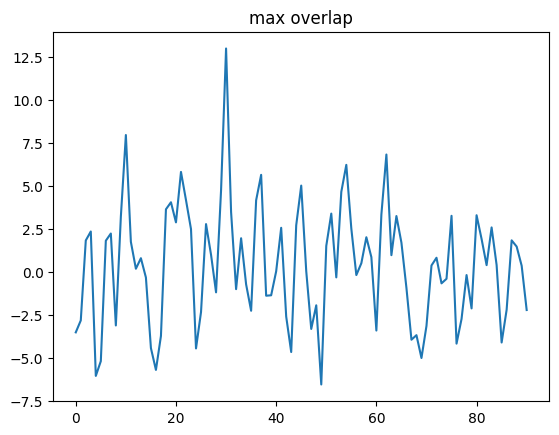

In [4]:
crossC = np.correlate(sequence, chunk)
print(f"index of max overlap: {np.argmax(crossC)}")
print(f"max overlap: {np.max(crossC)}")
fig = plt.figure()
plt.title("max overlap")
plt.plot(crossC)
plt.show

correlation exact match: 12.968392136267159


<function matplotlib.pyplot.show(close=None, block=None)>

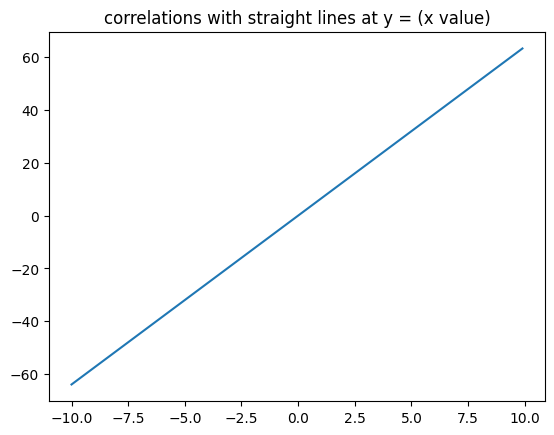

In [20]:
print(f"correlation exact match: {np.max(crossC)}")

beg = -100
end = 100
step = 1


correlations = []
for i in range(beg, end, step):
    line = np.zeros(100) + (i/10)
    correlations.append(np.correlate(line, chunk)[0])


fig = plt.figure()
plt.title("correlations with straight lines at y = (x value)")
plt.plot(np.arange(beg/10,end/10,step/10),correlations)
plt.show


Above shows that the correlation can be larger than a perfect match if there are values whose magnitude is much greater than that of the match.

In [10]:
def myCrossCorrelate(sequenceA, sequenceB):
    correlation = []
    for i in range(len(sequenceA)-len(sequenceB)):
        t = 0
        for j in range(len(sequenceB)):
            t += min(abs(sequenceA[i+j]), abs(sequenceB[j]))
        correlation.append(t)

    return correlation

## Homemade correlation function to address issues

index of max overlap: 30
max overlap: 10.35977052190331


<function matplotlib.pyplot.show(close=None, block=None)>

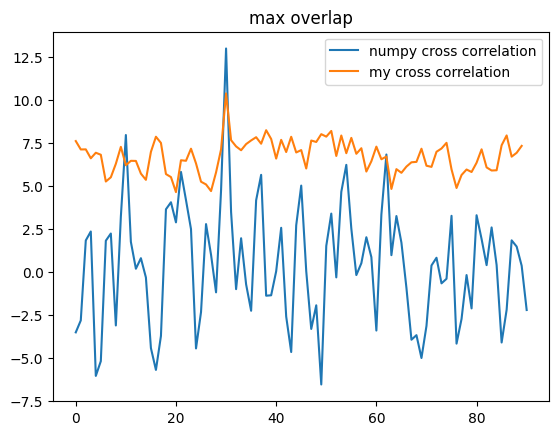

In [13]:
myCrossC = myCrossCorrelate(sequence, chunk)
print(f"index of max overlap: {np.argmax(myCrossC)}")
print(f"max overlap: {np.max(myCrossC)}")
fig = plt.figure()

plt.title("max overlap")
plt.plot(crossC, label=f"numpy cross correlation")
plt.plot(myCrossC, label="my cross correlation")
plt.legend()
plt.show

max 'correlation' with line:  10.35977052190331
correlation with exact match: 10.35977052190331


<function matplotlib.pyplot.show(close=None, block=None)>

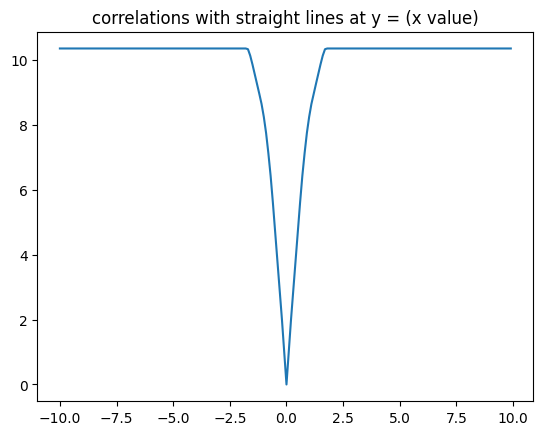

In [22]:
beg = -100
end = 100
step = 1


correlations = []
for i in range(beg, end, step):
    line = np.zeros(100) + (i/10)
    correlations.append(myCrossCorrelate(line, chunk)[0])

print(f"max 'correlation' with line:  {max(correlations)}")
print(f"correlation with exact match: {max(myCrossC)}")


fig = plt.figure()
plt.title("correlations with straight lines at y = (x value)")
plt.plot(np.arange(beg/10,end/10,step/10),correlations)
plt.show

using "myCrossCorrelate" function - max correlations are limited to the correlation of a perfect match

## Using total distance between sequences

In [34]:
def slidingDifference(sequenceA, sequenceB):
    error = []
    for i in range(len(sequenceA)-len(sequenceB)):
        t = 0
        for j in range(len(sequenceB)):
            t += cityblock(sequenceA[i:i+len(sequenceB)], sequenceB)
        error.append(-t)

    return error

index of max overlap: 30
max overlap: -0.0


<function matplotlib.pyplot.show(close=None, block=None)>

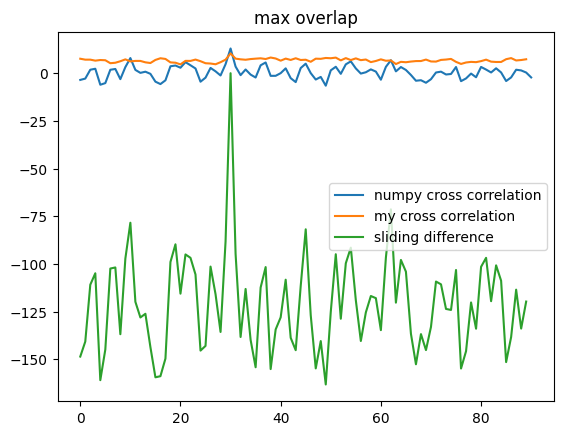

In [35]:
myError = slidingDifference(sequence, chunk)
print(f"index of max overlap: {np.argmax(myError)}")
print(f"max overlap: {np.max(myError)}")
fig = plt.figure()

plt.title("max overlap")
plt.plot(crossC, label=f"numpy cross correlation")
plt.plot(myCrossC, label="my cross correlation")
plt.plot(myError, label="sliding difference")

plt.legend()
plt.show

sliding difference shows a very clear peak at the correct position.

max 'correlation' with line:  -77.05436476145225
correlation with exact match: 10.35977052190331


<function matplotlib.pyplot.show(close=None, block=None)>

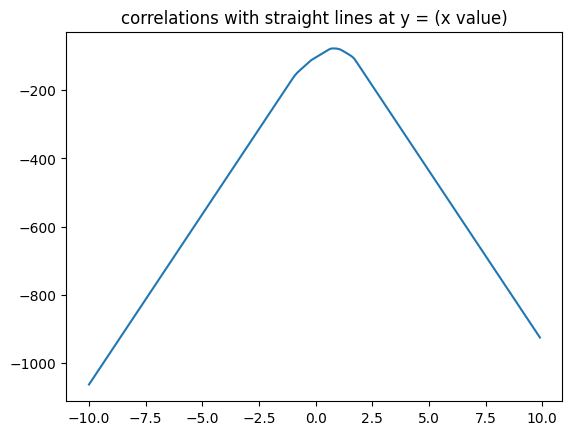

In [36]:
beg = -100
end = 100
step = 1


correlations = []
for i in range(beg, end, step):
    line = np.zeros(100) + (i/10)
    correlations.append(slidingDifference(line, chunk)[0])

print(f"max 'correlation' with line:  {max(correlations)}")
print(f"correlation with exact match: {max(myCrossC)}")


fig = plt.figure()
plt.title("correlations with straight lines at y = (x value)")
plt.plot(np.arange(beg/10,end/10,step/10),correlations)
plt.show

This shows that the closest "straight line" is still no where near the correlation with the exact match. This method of directly comparing distances seems to solve all the problems of the other 2 cross correlation methods. The problems with this method are:
* It may fall victim to noise
    * If there is a large noise spike, then this method may not match on an otherwise perfectly similar vector.
* It is incredibly slow.